In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png
/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv


In [86]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (48895, 16)


In [87]:
print("Sample of the dataset: ")
df.head(3)

Sample of the dataset: 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [88]:
null_columns=df.columns[df.isnull().any()].tolist()
print("Columns having null values and their respective count: ",null_columns)
for col in null_columns:
    print("#Null values in ", col, "are ", df[col].isnull().sum())

Columns having null values and their respective count:  ['name', 'host_name', 'last_review', 'reviews_per_month']
#Null values in  name are  16
#Null values in  host_name are  21
#Null values in  last_review are  10052
#Null values in  reviews_per_month are  10052


In [89]:
#Display Basic Statiscal summary of the data
print("Number of Listing in AIRBNB NYC: ",df.id.nunique(dropna=True))
print("Number of Hosts in NYC: ",df.host_id.nunique(dropna=True))
print("Percentage of Hosts having more than one listing in NYC: ",sum(df.host_id.value_counts()>1)*100/df.host_id.nunique(dropna=True),"%")  # Another way: a=(df.host_id.value_counts()>1) a[a==True].index.nunique(), or use calculated_host_listings_count column
print("Summary statistics for Key features: ")
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()
# print('Variation of price for AIRBNB NYC')
# plt.boxplot(df.price,notch=True);


Number of Listing in AIRBNB NYC:  48895
Number of Hosts in NYC:  37457
Percentage of Hosts having more than one listing in NYC:  13.759777878634168 %
Summary statistics for Key features: 


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Top ten Neighbourhoods with most number of listings: 


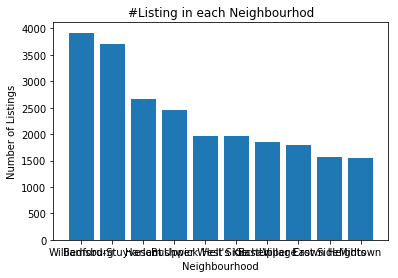

In [90]:
print("Top ten Neighbourhoods with most number of listings: ")
n_=df.neighbourhood.value_counts()[0:10]
y_pos=np.arange(len(n_.index))
plt.bar(y_pos,n_.values,align='center')
plt.xticks(y_pos,n_.index)
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood')
plt.title('#Listing in each Neighbourhod')
plt.show()

Number of Listing per Neighbourhood group: 


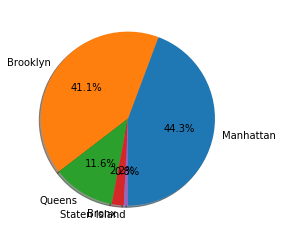

In [91]:
print("Number of Listing per Neighbourhood group: ")
n_groups=df.neighbourhood_group.value_counts()
plt.pie(n_groups.values,labels=n_groups.index,shadow=True,startangle=270,autopct='%1.1f%%');
# y_pos=np.arange(len(n_groups.index))
# plt.bar(y_pos,n_groups.values,align='center')
# plt.xticks(y_pos,n_groups.index)
# plt.ylabel('Number of Listings')
# plt.xlabel('Neighbourhood Group')
# plt.title('#Listing in each Neighbourhod group')
#plt.show()

Division for room types in NYC: 


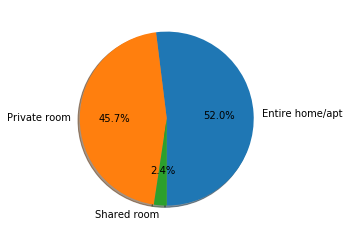

In [92]:
print("Division for room types in NYC: ")
room_types=df.room_type.value_counts()
plt.pie(room_types.values,labels=room_types.index,shadow=True,startangle=270,autopct='%1.1f%%');
#Subplots
# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.pie(n_groups.values,labels=n_groups.index,shadow=True,startangle=270,autopct='%1.1f%%')
# ax2.pie(room_types.values,labels=room_types.index,shadow=True,startangle=270,autopct='%1.1f%%')
# plt.tight_layout()

In [93]:
print('Statistics of Listings which were available throughou the year: ')
df_365=df[df['availability_365']==365]
print("Number of such properties: ",df_365.shape[0],'Their Percentage: ',df_365.shape[0]*100/df.shape[0],'%')
print("Summary statistics for Key features of such properties(for comparision with all properties): ")
df_365[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

Statistics of Listings which were available throughou the year: 
Number of such properties:  1295 Their Percentage:  2.6485325697924123 %
Summary statistics for Key features of such properties(for comparision with all properties): 


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


Hosts with Lowest average prices of their listings and their prices: 


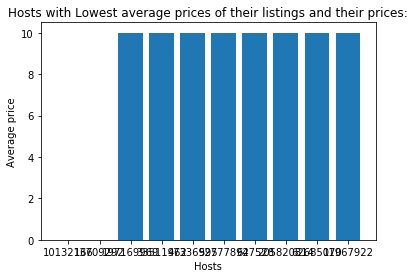

Hosts with Highest average prices of their listings and their prices: 


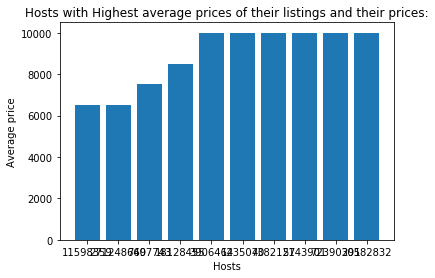

In [94]:
#Which hosts have higher demand(highest prices) and why?
host_=df.groupby('host_id')['price'].mean()
host_=host_.sort_values()
print("Hosts with Lowest average prices of their listings and their prices: ")
# # print(host_.head(10))
n_=host_.head(10)
y_pos=np.arange(len(n_.index))
plt.bar(y_pos,n_.values,align='center')
plt.xticks(y_pos,n_.index)
plt.ylabel('Average price')
labels=y_pos
# plt.xticks(n_.values, rotation='vertical')
plt.xlabel('Hosts')
plt.title('Hosts with Lowest average prices of their listings and their prices:')
plt.show()

print("Hosts with Highest average prices of their listings and their prices: ")
# # print(host_.head(10))
n_=host_.tail(10)
y_pos=np.arange(len(n_.index))
plt.bar(y_pos,n_.values,align='center')
plt.xticks(y_pos,n_.index)
plt.ylabel('Average price')
labels=y_pos
# plt.xticks(n_.values, rotation='vertical')
plt.xlabel('Hosts')
plt.title('Hosts with Highest average prices of their listings and their prices:')
plt.show()

In [95]:
#To compare statistics of Top and bottom 10 hosts
df_b10=df[df['host_id'].isin(host_.head(10).index)]
df_b10_des=df_b10[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()
df_t10=df[df['host_id'].isin(host_.tail(10).index)]
df_t10_des=df_t10[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()
t10_names=df_t10_des.columns.values.tolist()
b10_names=df_b10_des.columns.values.tolist()
t10_names=[s + '_top' for s in t10_names]
b10_names=[s + '_bottom' for s in b10_names]
df_t10_des.columns=t10_names
df_b10_des.columns=b10_names
df_hosts=pd.concat([df_b10_des,df_t10_des],axis=1)
Ordered_list=['price_bottom', 'price_top', 'minimum_nights_bottom','minimum_nights_top', 'number_of_reviews_bottom','number_of_reviews_top',
       'reviews_per_month_bottom','reviews_per_month_top', 'calculated_host_listings_count_bottom','calculated_host_listings_count_top',
       'availability_365_bottom',
        'availability_365_top']
print("Comparision of statistics of Bottom 10 and Top 10 listings")
print(df_hosts[Ordered_list])

Comparision of statistics of Bottom 10 and Top 10 listings
       price_bottom     price_top  minimum_nights_bottom  minimum_nights_top  \
count      10.00000     10.000000              10.000000           10.000000   
mean        8.00000   8899.700000               2.500000           48.100000   
std         4.21637   1523.643371               1.581139           59.457641   
min         0.00000   6500.000000               1.000000            1.000000   
25%        10.00000   7750.000000               1.000000            5.000000   
50%        10.00000   9999.000000               2.500000           30.000000   
75%        10.00000   9999.750000               3.000000           81.750000   
max        10.00000  10000.000000               5.000000          180.000000   

       number_of_reviews_bottom  number_of_reviews_top  \
count                 10.000000              10.000000   
mean                  13.500000               1.600000   
std                   28.768231               

Average price of Bottom and Top 10 Neighbourhoods


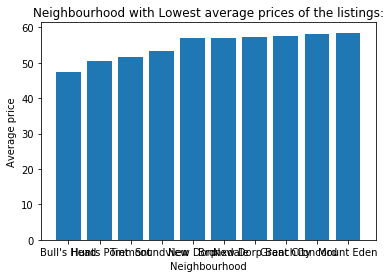

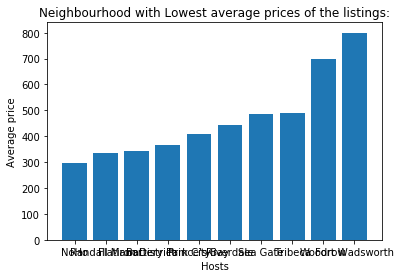

In [96]:
#Analysis of neighbourhood
print("Average price of Bottom and Top 10 Neighbourhoods")
df['neighbourhood'].value_counts()
host_=df.groupby('neighbourhood')['price'].mean()
host_=host_.sort_values()
n_=host_.head(10)
y_pos=np.arange(len(n_.index))
plt.bar(y_pos,n_.values,align='center')
plt.xticks(y_pos,n_.index)
plt.ylabel('Average price')
labels=y_pos
plt.xlabel('Neighbourhood')
plt.title('Neighbourhood with Lowest average prices of the listings:')
plt.show();

n_=host_.tail(10)
y_pos=np.arange(len(n_.index))
plt.bar(y_pos,n_.values,align='center')
plt.xticks(y_pos,n_.index)
plt.ylabel('Average price')
labels=y_pos
plt.xlabel('Hosts')
plt.title('Neighbourhood with Lowest average prices of the listings:');

Revenue generated from each room type:
Revenue by  Entire home/apt  is  5381480.0
Revenue by  Private room  is  2004450.0
Revenue by  Shared room  is  81348.0


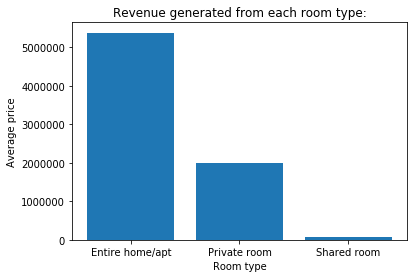

In [97]:
num_rooms=df['room_type'].value_counts()
# print(num_rooms)
host_=df.groupby('room_type')['price'].mean()
# host_=host_.sort_values()
revenue=[0]*len(host_.values)
for i in range(len(host_.values)):
    revenue[i]=host_.values[i]*num_rooms[i]
# print(revenue)
# print(host_)
temp=host_.index.tolist()
print('Revenue generated from each room type:')
for i in range(len(temp)):
    print('Revenue by ',temp[i],' is ', revenue[i])
y_pos=np.arange(len(host_.index))
plt.bar(y_pos,revenue,align='center')
plt.xticks(y_pos,host_.index)
plt.ylabel('Average price')
labels=y_pos
plt.xlabel('Room type')
plt.title('Revenue generated from each room type:')
plt.show();

In [98]:
print('Dependence of price and other factors on eac other: ')
df_imp=df[['id', 'neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'price','minimum_nights', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df_cont=df[['latitude', 'longitude', 'price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df_cont.cov()


Dependence of price and other factors on eac other: 


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,0.002974,0.000213,0.444448,0.027815,-0.037385,-0.000937,0.035071,-0.078832
longitude,0.000213,0.002130,-1.662923,-0.059403,0.121516,0.011452,-0.174476,0.502610
price,0.444448,-1.662923,57674.025247,210.816423,-513.062658,-10.130007,454.812827,2586.579899
minimum_nights,0.027815,-0.059403,210.816423,420.682642,-73.206612,-3.555423,86.484621,389.567112
number_of_reviews,-0.037385,0.121516,-513.062658,-73.206612,1984.754380,44.525195,-106.251958,1008.743866
reviews_per_month,-0.000937,0.011452,-10.130007,-3.555423,44.525195,2.823885,-0.416306,40.444939
calculated_host_listings_count,0.035071,-0.174476,454.812827,86.484621,-106.251958,-0.416306,1085.868499,978.931391
availability_365,-0.078832,0.502610,2586.579899,389.567112,1008.743866,40.444939,978.931391,17324.426923


In [99]:
print('Dependency of Price on other Numerical features: ')
print(df_cont.cov()['price'])
print('Hence we can conclude that Availabilty_365 and then calculated_host_listing_count effect price with a positive relationship and number_of_reviews effect the price most negatively')

Dependency of Price on other Numerical features: 
latitude                              0.444448
longitude                            -1.662923
price                             57674.025247
minimum_nights                      210.816423
number_of_reviews                  -513.062658
reviews_per_month                   -10.130007
calculated_host_listings_count      454.812827
availability_365                   2586.579899
Name: price, dtype: float64
Hence we can conclude that Availabilty_365 and then calculated_host_listing_count effect price with a positive relationship and number_of_reviews effect the price most negatively


In [100]:
# print('Dependency of Categorical features on price')
# #Conversion of Categorical values to Numerical values
# cat_list=['neighbourhood_group','neighbourhood', 'room_type']
# cat_list_num=[s + '_num' for s in cat_list]
# # df_frame=df.to_frame()
# for i in range(len(cat_list)):
# #     print('Data type of',cat_list[i],': ',type(cat_list[i]))
#     df[cat_list[i]] = df[cat_list[i]].astype('category')
#     df[cat_list_num[i]]=df[cat_list[i]].cat.codes
# # df.head()
# #For categorical Values
# list1=['neighbourhood_group_num','neighbourhood_num', 'room_type_num','price']
# normalized_df=(df[list1]-df[list1].mean())/df[list1].std()    #Mean normalisation
# print(df[list1].cov()['price'])
# print('Hence, We can conclude that Neighbourhood affects price the most positively while room type effects')